In [19]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 1000)

### Load Data

In [21]:
data_dir = 'data\\'
cvadr = pd.read_csv(data_dir + 'final_dataset.csv')
cvadr.head(2)

,Unnamed: 0,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE,SOURCE,WEIGHT_KG,INVOLVEMENT,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,REACTION,SOC,SIDER
0,0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,NaN,NaN,NaN,NaN,NaN,NaN,Pharmacist,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,International normalised ratio increased,Investigations,False
1,1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,NaN,NaN,NaN,NaN,NaN,NaN,Pharmacist,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,Drug ineffective,General disorders and administration site cond...,False


In [22]:
cvadr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616282 entries, 0 to 616281
Data columns (total 28 columns):
Unnamed: 0                  616282 non-null int64
DRUG_NAME                   616282 non-null object
MASS                        616282 non-null float64
ATC_LEVEL_2                 616282 non-null object
ATC_VECTOR                  616282 non-null object
TARGETS                     616282 non-null object
TARGET_VECTOR               616282 non-null object
REPORT_NO                   616282 non-null int64
DATE_RECEIVED               616282 non-null object
REPORT_TYPE                 616273 non-null object
GENDER                      607126 non-null object
AGE                         616282 non-null float64
DEATH                       117812 non-null float64
DISABILITY                  112603 non-null float64
CONGENITAL_ANOMALY          91923 non-null float64
LIFE_THREATENING            116159 non-null float64
HOSP_REQUIRED               195762 non-null float64
OTHER_MEDICALLY_IM

In [23]:
# name first row as primary key
cvadr = cvadr.rename(columns={'Unnamed: 0': 'ROW_ID'})
cvadr.head(2)

,ROW_ID,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE,SOURCE,WEIGHT_KG,INVOLVEMENT,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,REACTION,SOC,SIDER
0,0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,NaN,NaN,NaN,NaN,NaN,NaN,Pharmacist,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,International normalised ratio increased,Investigations,False
1,1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,NaN,NaN,NaN,NaN,NaN,NaN,Pharmacist,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,Drug ineffective,General disorders and administration site cond...,False


In [24]:
# change DATE_RECEIVED to datetime tpye
cvadr['DATE_RECEIVED'] = pd.to_datetime(cvadr['DATE_RECEIVED'] , yearfirst=True)

### Descriptive Stats

In [25]:
# count
# distinct count
# null count
# min/max

count = cvadr.count()
dcount = cvadr.nunique()
ncount = cvadr.isna().sum()
dtypes = cvadr.dtypes


In [26]:
desc_stats = pd.concat([count, ncount, dcount, dtypes], axis=1)
desc_stats.columns = ['count', 'empty', 'unique count', 'data type']
desc_stats['empty_%'] = desc_stats['empty']/1034772*100

desc_stats.style.format({'empty_%': '{:,.2f}%'})

,count,empty,unique count,data type,empty_%
ROW_ID,616282,0,616282,int64,0.00%
DRUG_NAME,616282,0,1088,object,0.00%
MASS,616282,0,1024,float64,0.00%
ATC_LEVEL_2,616282,0,385,object,0.00%
ATC_VECTOR,616282,0,363,object,0.00%
TARGETS,616282,0,821,object,0.00%
TARGET_VECTOR,616282,0,820,object,0.00%
REPORT_NO,616282,0,207775,int64,0.00%
DATE_RECEIVED,616282,0,12727,datetime64[ns],0.00%
REPORT_TYPE,616273,9,7,object,0.00%


In [27]:
desc_stats.to_csv(data_dir + 'desc_stats.csv')

In [28]:
desc_stats_numeric = cvadr.describe().round()
desc_stats_numeric.to_csv(data_dir + 'desc_stats_numeric.csv')
desc_stats_numeric

,ROW_ID,MASS,REPORT_NO,AGE,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,WEIGHT_KG,CONCOMITANT_DRUGS
count,616282.0,616282.0,616282.0,616282.0,117812.0,112603.0,91923.0,116159.0,195762.0,224279.0,214346.0,616282.0
mean,685185.0,373.0,128936873.0,51.0,2.0,2.0,2.0,2.0,1.0,1.0,70.0,2.0
std,399451.0,212.0,315266456.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,3.0
min,0.0,30.0,1.0,-62.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
25%,332594.0,266.0,139472.0,35.0,1.0,2.0,2.0,2.0,1.0,1.0,57.0,0.0
50%,662470.0,327.0,318684.0,54.0,2.0,2.0,2.0,2.0,1.0,1.0,68.0,1.0
75%,1050270.0,415.0,647106.0,68.0,2.0,2.0,2.0,2.0,2.0,1.0,82.0,3.0
max,1323890.0,5006.0,902816047.0,119.0,2.0,2.0,2.0,2.0,2.0,2.0,772.0,108.0


### Univariate Plots

In [29]:
# count distinct reorts, drugs, and SE per year
# fix dates prior to 1970

counts_by_year = cvadr.groupby(cvadr['DATE_RECEIVED'].dt.year)['ROW_ID','REPORT_NO','DRUG_NAME','REACTION'].nunique()
counts_by_year = counts_by_year.reset_index()
counts_by_year['DATE_RECEIVED'] = counts_by_year['DATE_RECEIVED'].apply(lambda x: x if x < 2020 else x-100)
counts_by_year.head()

# melt for plotting
counts_by_year_melt = counts_by_year.melt(id_vars='DATE_RECEIVED', value_vars=['ROW_ID','REPORT_NO','DRUG_NAME','REACTION'], var_name='VAR', value_name='COUNT')


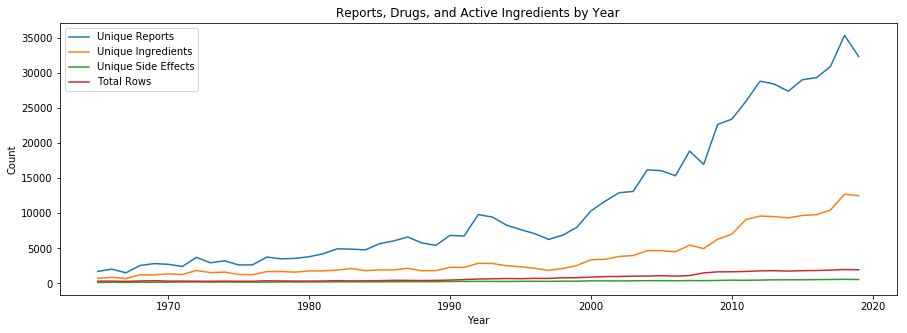

In [30]:
fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='DATE_RECEIVED', y='COUNT', data=counts_by_year_melt, hue='VAR', ax=ax)

plot1 = plt.xlabel('Year')
plot1 = plt.ylabel('Count')
plot1 = plt.title("Reports, Drugs, and Active Ingredients by Year")

plot1_labels = ax.get_legend_handles_labels()[0][1:5]
ax.legend(plot1_labels, ['Unique Reports','Unique Ingredients','Unique Side Effects', 'Total Rows'])

plt.show()

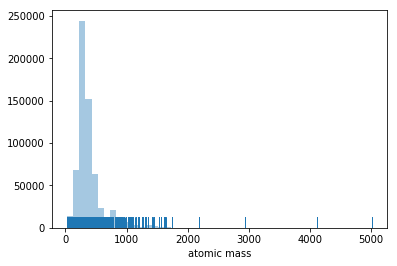

In [31]:
# histogram for mass

x = cvadr[['MASS']]
ax = sns.distplot(x, axlabel='atomic mass', rug=True, kde=False)


In [32]:
y = cvadr[['ROW_ID','REACTION','SOC']]
x = y.groupby('REACTION')['ROW_ID'].count().reset_index()
x.columns = ['REACTION', 'ROW_COUNT']
z = x.merge(y, how='left', on='REACTION')[['REACTION','SOC','ROW_COUNT']]
z = z.drop_duplicates()

soc_list = list(z.SOC.unique())
color_range = list(np.linspace(0, 1, len(soc_list), endpoint=False))
colors = [plt.cm.tab20b(x) for x in color_range]
color_dict = dict(zip(soc_list, colors))
color_dict
color_df = pd.DataFrame.from_dict(color_dict, orient='Index', columns=['r','g', 'b', 'a']).reset_index()
color_df['rgba'] = list(zip(color_df['r'], color_df['g'], color_df['b'], color_df['a']))
color_df = color_df[['index','rgba']]
color_df.columns = ['SOC','RGBA']

# limit to top 50
z = z.merge(color_df).sort_values(by='ROW_COUNT', ascending=False).head(50)


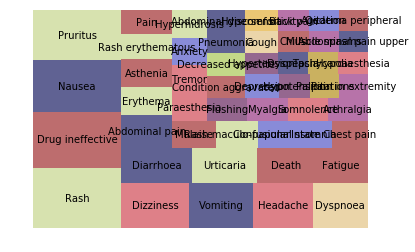

In [33]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)

#norm = matplotlib.colors.Normalize(vmin=min(dataAssists.A), vmax=max(dataAssists.A))
#colors = [matplotlib.cm.Blues(norm(value)) for value in dataAssists.A]

#= pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=z['ROW_COUNT'], label=z['REACTION'], color = z['RGBA'], alpha=.8 )
plt.axis('off')
plt.show()


In [36]:
# tree plot of atc category
# T/F for colour

In [37]:
# tree plot for targets
# T/F for colour

In [18]:
crashes.head()

NameError: name 'crashes' is not defined

In [38]:
cvadr.columns.values

array(['ROW_ID', 'DRUG_NAME', 'MASS', 'ATC_LEVEL_2', 'ATC_VECTOR',
       'TARGETS', 'TARGET_VECTOR', 'REPORT_NO', 'DATE_RECEIVED',
       'REPORT_TYPE', 'GENDER', 'AGE', 'DEATH', 'DISABILITY',
       'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED',
       'OTHER_MEDICALLY_IMP_COND', 'REPORTER_TYPE', 'SOURCE', 'WEIGHT_KG',
       'INVOLVEMENT', 'ADMIN_ROUTE', 'DOSAGE_FORM', 'CONCOMITANT_DRUGS',
       'REACTION', 'SOC', 'SIDER'], dtype=object)

In [39]:
x = cvadr[['ROW_ID', 'DEATH', 'DISABILITY', 'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED', 'OTHER_MEDICALLY_IMP_COND']]
ser_cat = ['DEATH', 'DISABILITY', 'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED', 'OTHER_MEDICALLY_IMP_COND']

count=[]
for i in ser_cat:
    count.append(x[x[i]==1][i].count())
    
y = pd.DataFrame.from_dict(dict(zip(ser_cat, count)), orient='Index').reset_index()
y.columns = ['CATEGORY', 'COUNT']
y['TOTAL'] = x['ROW_ID'].count()
y

,CATEGORY,COUNT,TOTAL
0,DEATH,36342,616282
1,DISABILITY,24573,616282
2,CONGENITAL_ANOMALY,612,616282
3,LIFE_THREATENING,28892,616282
4,HOSP_REQUIRED,129576,616282
5,OTHER_MEDICALLY_IMP_COND,187884,616282


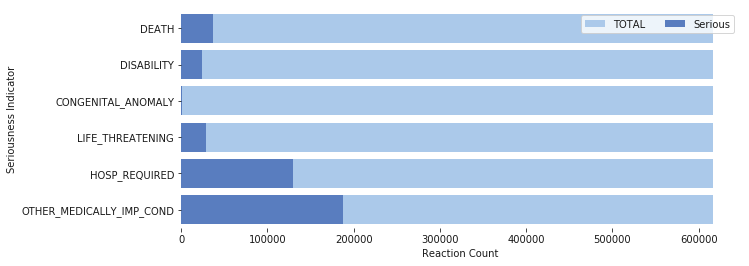

In [40]:
# stacked bar plto for seriousness flags


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10,4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="TOTAL", y="CATEGORY", data=y,
            label="TOTAL", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="COUNT", y="CATEGORY", data=y,
            label="Serious", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, frameon=True)
ax.set(ylabel="Seriousness Indicator", xlabel="Reaction Count")
sns.despine(left=True, bottom=True)

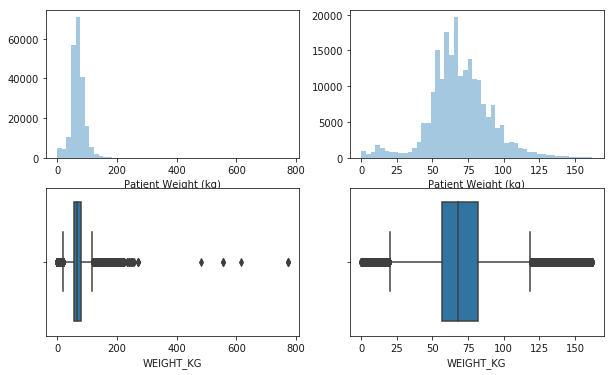

In [41]:
# histogram for weight

x = cvadr[cvadr['WEIGHT_KG'].notnull()]['WEIGHT_KG']

from scipy import stats

z = np.abs(stats.zscore(x))
threshold = 4
y = x[(z < threshold)]

fig, ax = plt.subplots(2, 2, figsize=(10,6))
ax1 = sns.distplot(x, axlabel='Patient Weight (kg)', kde=False, ax=ax[0,0])
ax2 = sns.distplot(y, axlabel='Patient Weight (kg)', kde=False, ax=ax[0,1])
ax3 = sns.boxplot(x, ax=ax[1, 0])
ax4 = sns.boxplot(y, ax=ax[1, 1])


plt.show()

# need to remove outliers

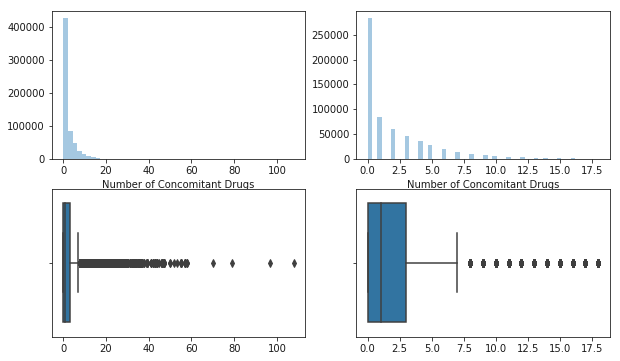

In [42]:
# histogram for concomitant drugs

x = cvadr[['CONCOMITANT_DRUGS']]

# remove outliers

from scipy import stats

z = np.abs(stats.zscore(x))
threshold = 5
y = x[(z < threshold)]


fig, ax = plt.subplots(2, 2, figsize=(10,6))
ax1 = sns.distplot(x, axlabel='Number of Concomitant Drugs', kde=False, ax=ax[0, 0])
ax2 = sns.distplot(y, axlabel='Number of Concomitant Drugs', kde=False, ax=ax[0, 1])
ax3 = sns.boxplot(x, ax=ax[1, 0])
ax4 = sns.boxplot(y, ax=ax[1, 1])

plt.show()

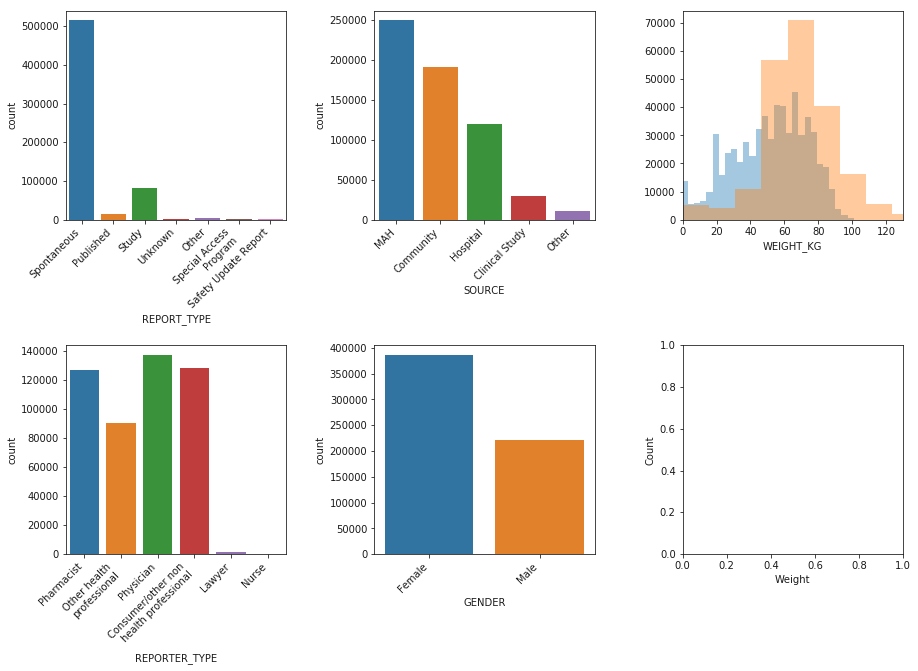

In [43]:
import textwrap

fig, ax = plt.subplots(2,3, figsize=(15,10), sharex=False)
plt.subplots_adjust(hspace=.6, wspace=.4)

plot3 = sns.countplot(x='REPORT_TYPE', data=cvadr, ax=ax[0,0])
plot3.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot3.get_xticklabels())], rotation=45, horizontalalignment='right')
plot3 = plt.xlabel('Report Type')
plot3 = plt.ylabel('Count')

plot4 = sns.countplot(x='REPORTER_TYPE', data=cvadr, ax=ax[1,0])
plot4.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot4.get_xticklabels())], rotation=45, horizontalalignment='right')
plot4 = plt.xlabel('Report Type')
plot4 = plt.ylabel('Count')

plot5 = sns.countplot(x='SOURCE', data=cvadr, ax=ax[0,1])
plot5.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot5.get_xticklabels())], rotation=45, horizontalalignment='right')
plot5 = plt.xlabel('Source')
plot5 = plt.ylabel('Count')

plot6 = sns.countplot(x='GENDER', data=cvadr, ax=ax[1,1])
plot6.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot6.get_xticklabels())], rotation=45, horizontalalignment='right')
plot6 = plt.xlabel('Gender')
plot6 = plt.ylabel('Count')

plot7 = sns.distplot(cvadr['AGE'], ax=ax[0,2], kde=False)
plot7 = plt.xlabel('Age')
plot7 = plt.ylabel('Count')
ax[0,2].set_xlim(0,130)

plot8 = sns.distplot(cvadr['WEIGHT_KG'], ax=ax[0,2], kde=False)
plot8 = plt.xlabel('Weight')
plot8 = plt.ylabel('Count')
#ax[0,2].set_xlim(0,130)


# Show plot
plt.show()

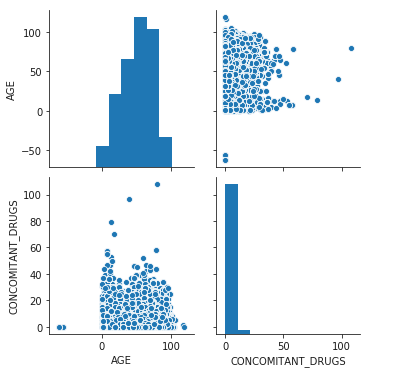

In [44]:
# there doesn't seem to be a relationship bewteen age ad concomitant drugs

cvadr1 = cvadr[['GENDER',
       'AGE', 'REPORTER_TYPE', 'SOURCE',
       'ADMIN_ROUTE', 'CONCOMITANT_DRUGS']]

sns.pairplot(cvadr1)

plt.show()

In [45]:
# time series plot wtih color for outcomes

# count distinct reorts, drugs, and SE per year
# fix dates prior to 1970

outcomes_by_year = cvadr.groupby([cvadr['DATE_RECEIVED'].dt.year, 'SIDER'])['ROW_ID'].count()
outcomes_by_year = outcomes_by_year.reset_index()
outcomes_by_year['DATE_RECEIVED'] = outcomes_by_year['DATE_RECEIVED'].apply(lambda x: x if x < 2020 else x-100)
outcomes_by_year.columns = ['YEAR', 'SIDER', 'COUNT']
outcomes_by_year_1 = outcomes_by_year.pivot(index='YEAR', columns='SIDER', values='COUNT').reset_index()
outcomes_by_year_1['Positive_%'] = outcomes_by_year_1[True]/(outcomes_by_year_1[False] + outcomes_by_year_1[True])

#outcomes_by_year.columns.values

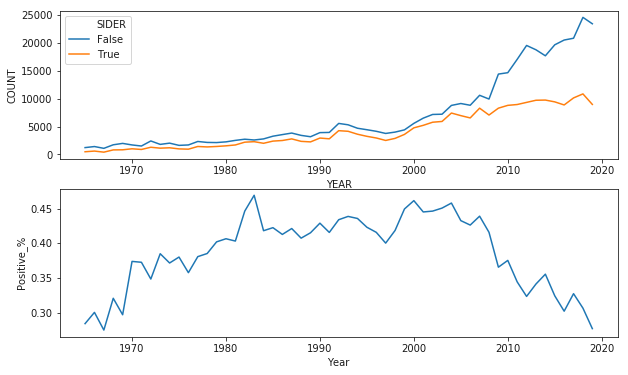

In [46]:
# melt for plotting
outcomes_by_year_melt = outcomes_by_year.melt(id_vars='YEAR', value_vars='COUNT', var_name='SIDER', value_name='COUNT')

fig, ax = plt.subplots(2,1, figsize=(10,6))

sns.lineplot(x='YEAR', y='COUNT', data=outcomes_by_year, hue='SIDER', ax=ax[0])
#sns.lineplot(x='YEAR', y=False, data=outcomes_by_year, ax=ax[0])
sns.lineplot(x='YEAR', y='Positive_%', data=outcomes_by_year_1, ax=ax[1])

plt.xlabel('Year')
#plot1 = plt.ylabel('Count')
#plot1 = plt.title("Outcomes by Year")

#plot1_labels = ax.get_legend_handles_labels()[0][1:5]
#ax.legend(plot1_labels, ['Unique Reports','Unique Ingredients','Unique Side Effects', 'Total Rows'])

plt.show()

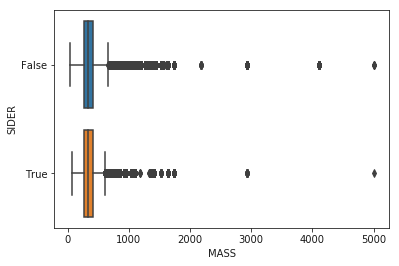

In [47]:
# box and whisker plot for mass


sns.boxplot(x='MASS', y='SIDER', data=cvadr, orient='h')
plt.show()

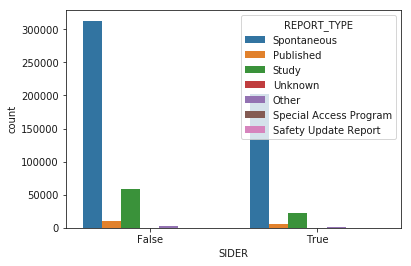

In [48]:
# report type

sns.countplot(x='SIDER', hue='REPORT_TYPE', data=cvadr)
plt.show()

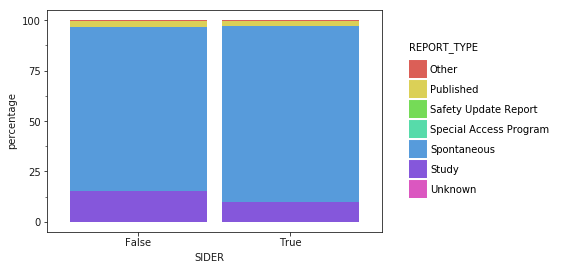

<ggplot: (-9223371870110083822)>

In [114]:
x = cvadr.groupby(['SIDER'])['REPORT_TYPE']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()

(ggplot(z, aes(x='SIDER', y='percentage', fill='REPORT_TYPE'))
 + geom_col()
 + theme('seaborn')
)


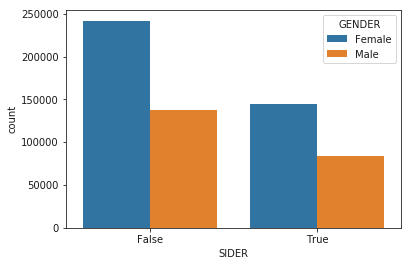

In [49]:
# scatter plot/box and whisker plot for gender

sns.countplot(x='SIDER', hue='GENDER', data=cvadr)
plt.show()

In [104]:
x = cvadr.groupby(['SIDER'])['GENDER']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()
#m = z.melt(id_vars=['SIDER','GENDER'], value_vars=['counts', 'percentage'])


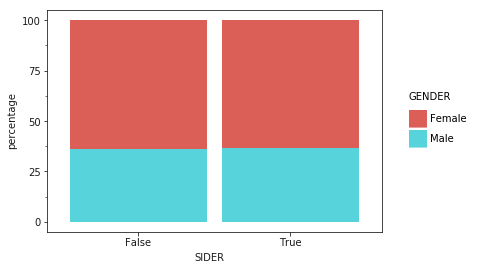

<ggplot: (-9223371870118608268)>

In [105]:
from plotnine import *
from plotnine.data import mtcars


(ggplot(z, aes(x='SIDER', y='percentage', fill='GENDER'))
 + geom_col()
 + theme('seaborn')
)


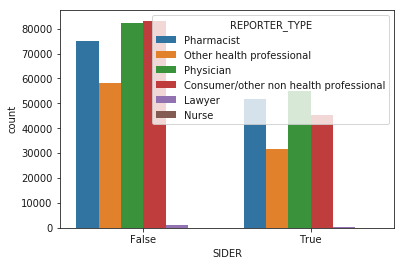

In [50]:
# scatter plot/box and whisker plot for reporter type

sns.countplot(x='SIDER', hue='REPORTER_TYPE', data=cvadr)
plt.show()

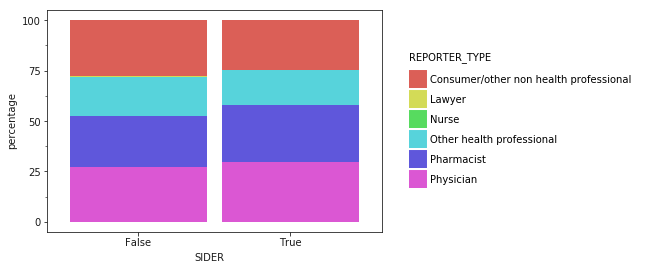

<ggplot: (166736231302)>

In [102]:
x = cvadr.groupby(['SIDER'])['REPORTER_TYPE']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()

(ggplot(z, aes(x='SIDER', y='percentage', fill='REPORTER_TYPE'))
 + geom_col()
 + theme('seaborn')
)


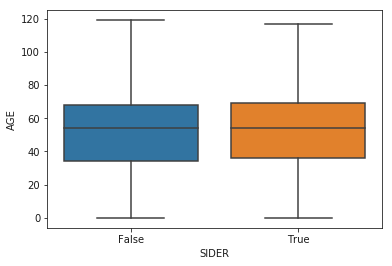

In [113]:
# scatter plot/box  for age with outcome as colour
# = cvadr[cvadr['AGE']>0]
# ax = sns.stripplot(x='SIDER', y='AGE', data=x, jitter=0.2)
ax = sns.boxplot(x='SIDER', y='AGE', data=x)

In [53]:
# scatter plot for each seriousness flag?


In [54]:
# reporter type: scatter plot with reporter type as colour; mosaic plot

In [55]:
# source: scatter plot with reporter type as colour; mosaic plot

In [56]:
# weight: box and whisker

In [57]:
# admin route: scatter plot with dosage as color

In [58]:
# dosage form: scatter plot with dosage as color

In [59]:
# concomitant drugs: scattter plot